# Import necessary libraries #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

TRAIN_DATASET = os.path.join('dataset', 'train.csv') 
TEST_DATASET= os.path.join('dataset', 'test.csv')

# Data Preprocessing #

In [2]:
dataset = pd.read_csv(TRAIN_DATASET)
df = dataset.copy()
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Given that this is a Kaggle provided dataset, it has already been labeled appropiately. Considering the description of the columns provided in [dataset/data_description.txt](dataset/data_description.txt), it is important to note that `NaN` values are important. They are required feature values for some of the houses. Therefore, `NaN` values will not  be discarded.

The column to predict is the `SalesPrice` column.

We don't need the `Id` column.

In [3]:
df = df.drop('Id', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

`MSSubClass` feature has `int64` data type but taking a look at the `description.txt` file, it is clear this is a categorical feature. Therefore, we will make it a categorical feature of string data type.

In [5]:
ms_subclass_mapping = {20: 'MSSSubClass_20', 30: 'MSSSubClass_30', 40: 'MSSSubClass_40', 45: 'MSSSubClass_45', 
                       50: 'MSSSubClass_50', 60: 'MSSSubClass_60', 70: 'MSSSubClass_70', 75: 'MSSSubClass_75', 
                       80: 'MSSSubClass_80', 85: 'MSSSubClass_85', 90: 'MSSSubClass_90', 120: 'MSSSubClass_120', 
                       150: 'MSSSubClass_150', 160: 'MSSSubClass_160', 180: 'MSSSubClass_180', 
                       190: 'MSSSubClass_190'}
df['MSSubClass'] = df['MSSubClass'].map(ms_subclass_mapping)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,MSSSubClass_60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,MSSSubClass_20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,MSSSubClass_60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,MSSSubClass_70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,MSSSubClass_60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are specific columns with `NaN` values which, according to the description file, are meant to be `NA` string values. Columns with these values will be converted appropiately.

In [6]:
nan_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
              'GarageType',  'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for column in nan_columns:
    df[column].replace({np.nan: 'NA'}, inplace=True)
    
# Specifically replace MasVnrType nan values with None
df['MasVnrType'].replace({np.nan: 'None'}, inplace=True)
    
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,MSSSubClass_60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,MSSSubClass_20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,MSSSubClass_60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,MSSSubClass_70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,MSSSubClass_60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis #

Conceptually, it is expected that larger houses cost more than smaller houses. Examining the correlation and relationship between measurements in square feet and its effect on the house price will give an understanding of how the features affect the cost. It will also help in identifying outliers and removing them.

In [7]:
columns = ['SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

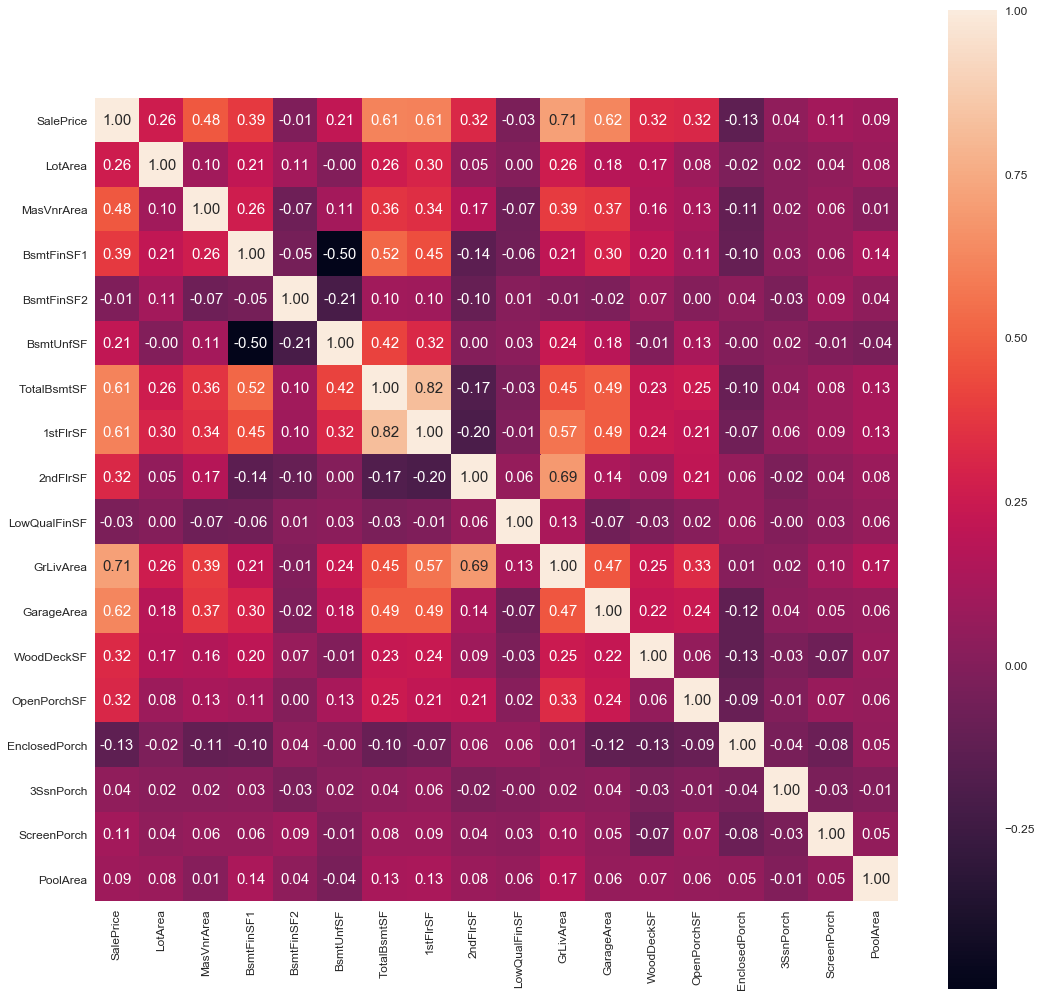

In [8]:
def show_corr_heatmap(cols):
    plt.figure(figsize=(18, 18))
    sns.set(font_scale=1.2)
    sns.heatmap(df[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
    plt.show()
    
show_corr_heatmap(columns)

Plotting set 1


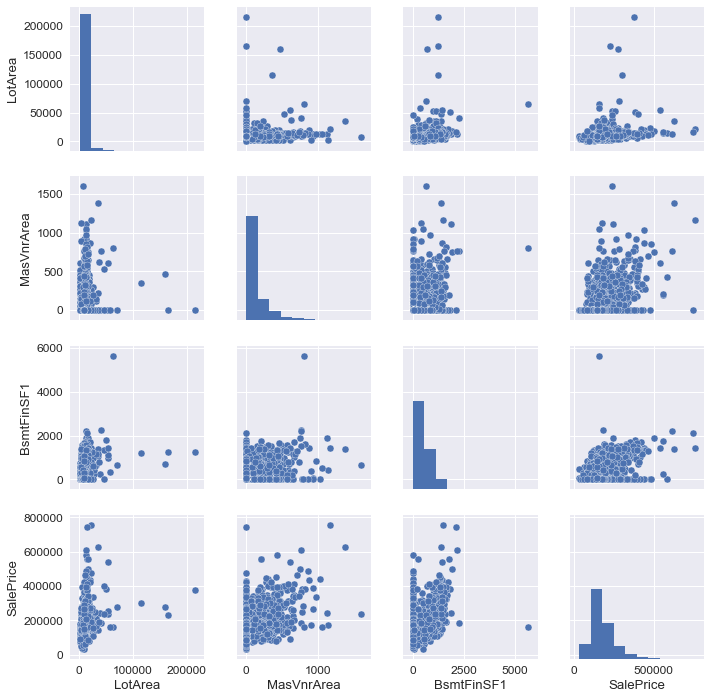

Plotting set 2


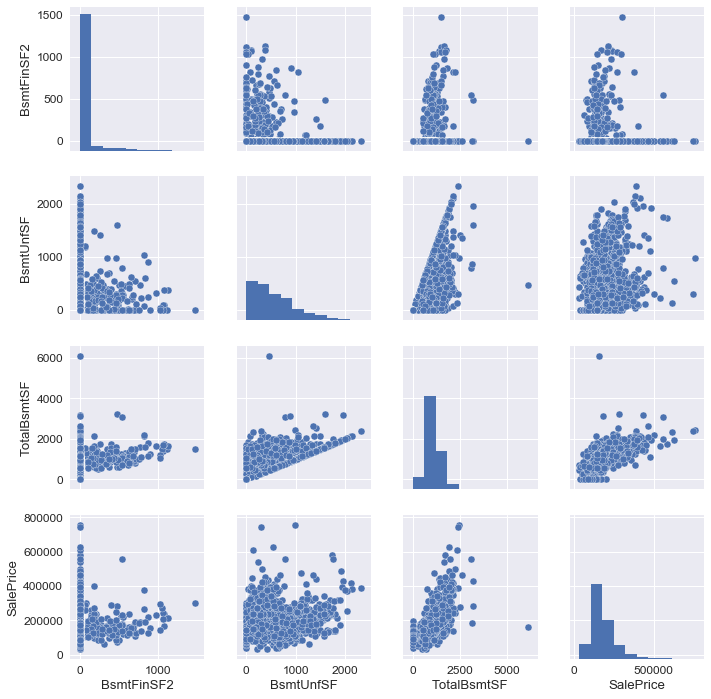

Plotting set 3


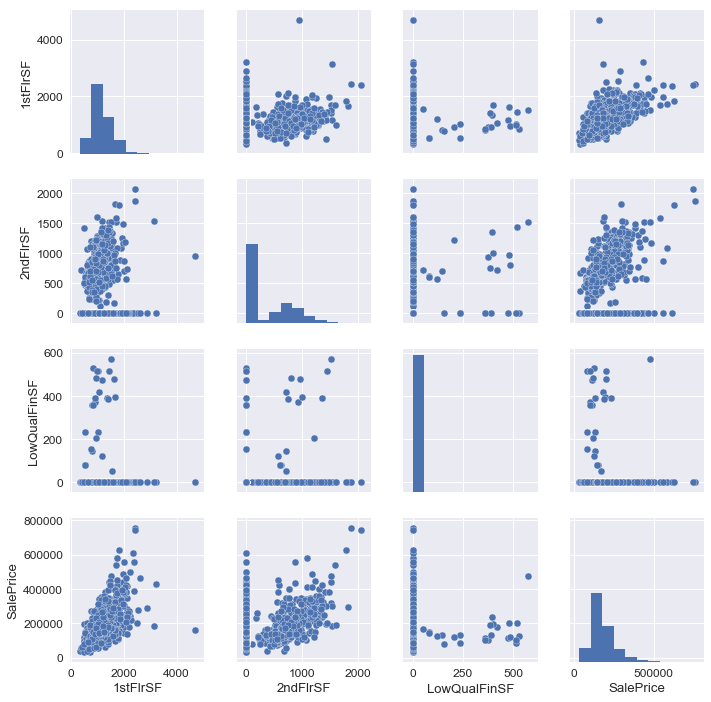

Plotting set 4


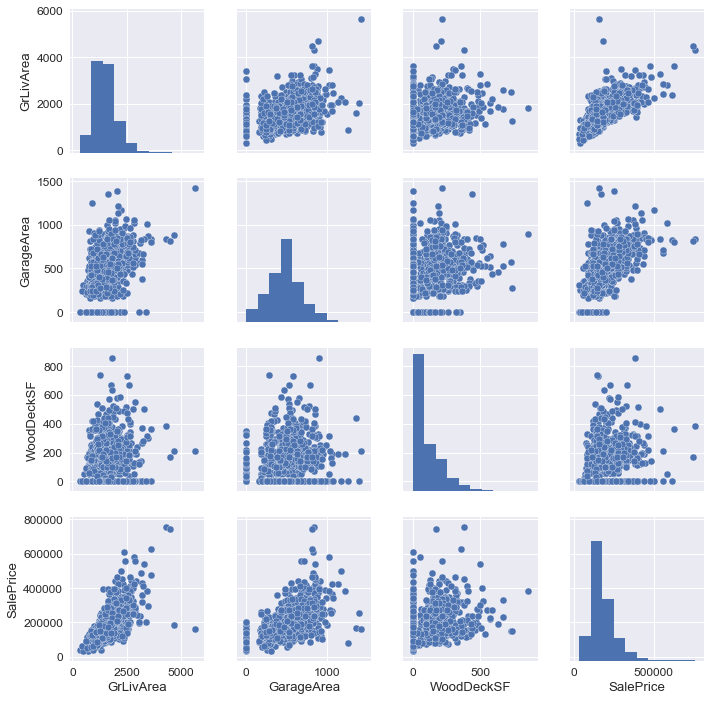

Plotting set 5


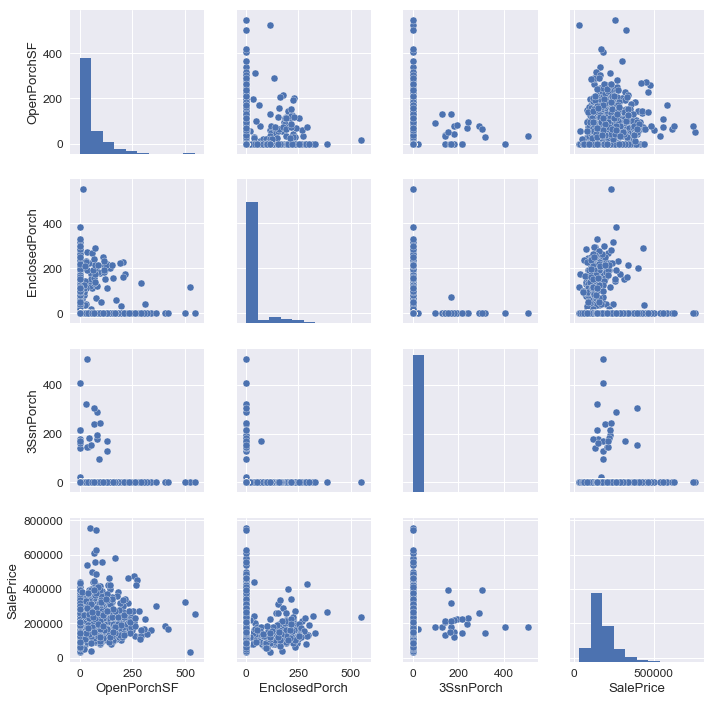

Plotting set 6


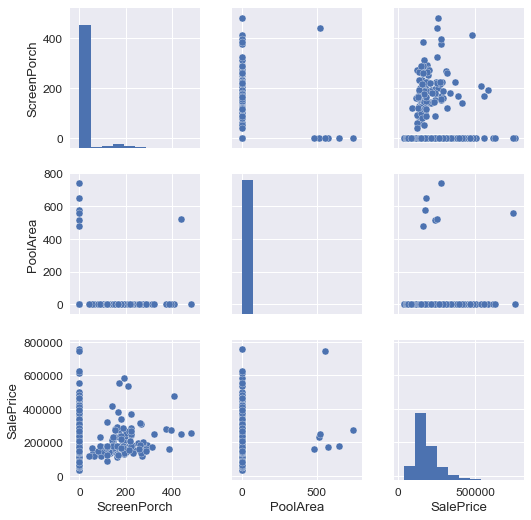

In [9]:
import math

# Plot correlations between measurements and sale price
def show_corr_plot(cols):
    sns.pairplot(df[cols].dropna())
    plt.show()

graphs_per_plot = 3  # Number of graphs to plot per page + 1 (sale price)
c = columns[1:]

for i in range(math.ceil(len(columns) / graphs_per_plot)):
    print('Plotting set {}'.format(i+1))
    cols = c[graphs_per_plot*i:graphs_per_plot*(i+1)]
    cols.append(columns[0])
    show_corr_plot(cols)
    print('=====================================================================================')

There are a few outliers that can be spotted in a few of the features. `LotArea` has some abnormalies because its expected that a larger lot area should correspond to a higher sale price (although other conditions could reduce the sale price large lots). `MasVnrArea` has similar outliers to `LotArea`. `TotalBsmtSF` which is the combination of `BsmtFinSF1`, `BsmtFinSF2` and `BsmtUnfSF` contains an outlier. Larger basement measurements should correlate positively with higher sale prices. `GrLivArea` contain similar outlier following the same logic.

Some features can be combined to present clearer information of their correlation with Sale Price.

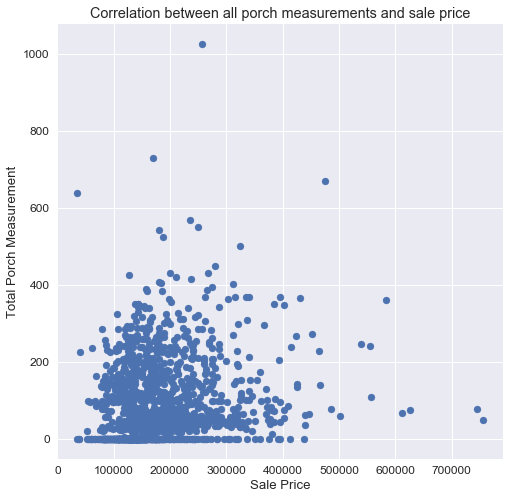

In [10]:
total_porch = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], total_porch)
plt.title('Correlation between all porch measurements and sale price')
plt.xlabel('Sale Price')
plt.ylabel('Total Porch Measurement')
plt.show()

## Removing Outliers ##

`TODO`
Outliers in the dataset will be removed using the **interquartile range (IQR)** IQR is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. A low and high interquartile boundary of 15% and 85% respectively will be used in calculating the interquartile range.

In [11]:
outlier_columns = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']
outlier_df = df[outlier_columns]
low = .05
high = .95
iqr = outlier_df.quantile([low, high])

outlier_df = outlier_df.apply(lambda x: x[(x > iqr.loc[low, x.name]) & (x < iqr.loc[high, x.name])], axis=0)
df.drop(outlier_columns, axis=1, inplace=True)
df = pd.concat([outlier_df, df], axis=1)
# df.dropna(inplace=True)
df.head()

,GrLivArea,TotalBsmtSF,1stFlrSF,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1710.0,856.0,856.0,MSSSubClass_60,RL,65.0,8450,Pave,NA,Reg,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,1262.0,1262.0,1262.0,MSSSubClass_20,RL,80.0,9600,Pave,NA,Reg,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,1786.0,920.0,920.0,MSSSubClass_60,RL,68.0,11250,Pave,NA,IR1,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,1717.0,756.0,961.0,MSSSubClass_70,RL,60.0,9550,Pave,NA,IR1,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,2198.0,1145.0,1145.0,MSSSubClass_60,RL,84.0,14260,Pave,NA,IR1,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [12]:
df.shape

(1460, 80)

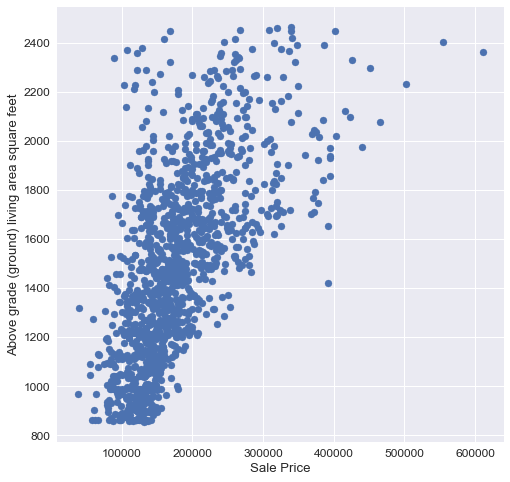

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], df['GrLivArea'])
plt.xlabel('Sale Price')
plt.ylabel('Above grade (ground) living area square feet')
plt.show()

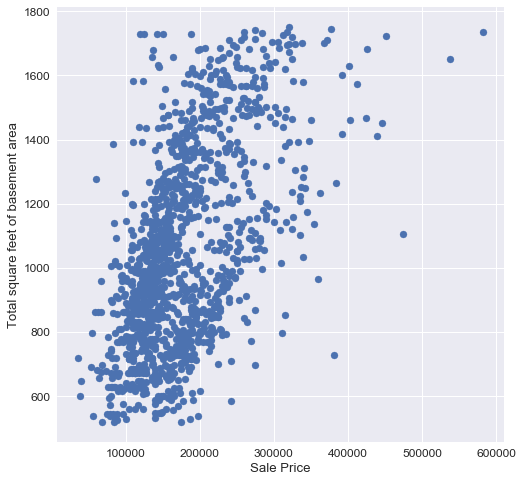

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], df['TotalBsmtSF'])
plt.xlabel('Sale Price')
plt.ylabel('Total square feet of basement area')
plt.show()

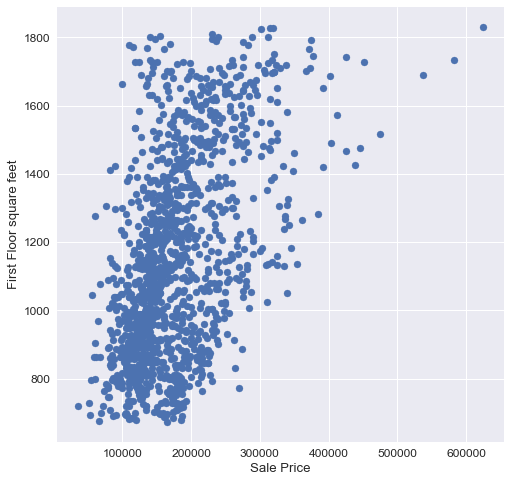

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(df['SalePrice'], df['1stFlrSF'])
plt.xlabel('Sale Price')
plt.ylabel('First Floor square feet')
plt.show()

# Feature Engineering #

## Separating ordinal from nominal features ##

Ordinal categorical features are those that can be sorted or ordered while nominal categorical features are not sorted or ordered. We will separate ordinal features from nominal features can encode each differently. Ordinal features will be encoded from lowest to highest while nominal features with be encoded using the one-hot encoding technique.

The table below shows the identified ordinal and nominal features in the data.

| Ordinal Features | Nominal Features |
|------------------|:----------------:|
| ExterQual        | MSSubClass       |
| ExterCond        | MSZoning         |
| BsmtQual         | Street**         |
| BsmtCond         | Alley            |
| BsmtExposure     | LandContour      |
| HeatingQC        | Utilities        |
| KitchenQual      | LotConfig        |
| FireplaceQu      | Neighborhood     |
| GarageFinish     | Condition1       |
| GarageQual       | Condition2       |
| GarageCond       | BldgType         |
| PavedDrive       | HouseStyle       |
| PoolQC           | RoofStyle        |
| LotShape         | RoofMatl         |
| LandSlope        | Exterior1st      |
|                  | Exterior2nd      |
|                  | MasVnrType       |
|                  | Foundation       |
|                  | BsmtFinType1     |
|                  | BsmtFinType2     |
|                  | Heating          |
|                  | Electrical       |
|                  | Functional       |
|                  | GarageType       |
|                  | Fence            |
|                  | MiscFeature      |
|                  | SaleType         |
|                  | SaleCondition    |
|                  | CentralAir**     |

`CentralAir` and `Street` is a binary classification, therefore it will be encoded manually.

In [16]:
# Map ordinal features to their corresponding integer values
# To avoid code duplication, we will add CentralAir and Street to the ordinals dictionary
ordinals = {
    'ExterQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'ExterCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'BsmtQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'BsmtCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'BsmtExposure': { 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0 },
    'HeatingQC': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'KitchenQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
    'FireplaceQu': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'GarageFinish': { 'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0 },
    'GarageQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'GarageCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 },
    'PavedDrive': { 'Y': 3, 'P': 2, 'N': 1 },
    'PoolQC': { 'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0 },
    'LotShape': { 'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1 },
    'LandSlope': { 'Gtl': 3, 'Mod': 2, 'Sev': 1 },
    'CentralAir': { 'N': 0, 'Y': 1 },
    'Street': { 'Grvl': 1, 'Pave': 2 }
}

for key in list(ordinals.keys()):
    df[key] = df[key].map(ordinals[key])
    print('{} -> {}'.format(key, ordinals[key]))
    
df.head()

ExterQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
ExterCond -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
BsmtQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
BsmtCond -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
BsmtExposure -> {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
HeatingQC -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
KitchenQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
FireplaceQu -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
GarageFinish -> {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
GarageQual -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
GarageCond -> {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
PavedDrive -> {'Y': 3, 'P': 2, 'N': 1}
PoolQC -> {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0}
LotShape -> {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
LandSlope -> {'Gtl': 3, 'Mod': 2, 'Sev': 1}
CentralAir -> {'N': 0, 'Y': 1}
Street -> {'Grvl': 1, 'Pave': 2}


,GrLivArea,TotalBsmtSF,1stFlrSF,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1710.0,856.0,856.0,MSSSubClass_60,RL,65.0,8450,2,NA,4,...,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,1262.0,1262.0,1262.0,MSSSubClass_20,RL,80.0,9600,2,NA,4,...,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,1786.0,920.0,920.0,MSSSubClass_60,RL,68.0,11250,2,NA,3,...,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,1717.0,756.0,961.0,MSSSubClass_70,RL,60.0,9550,2,NA,3,...,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,2198.0,1145.0,1145.0,MSSSubClass_60,RL,84.0,14260,2,NA,3,...,0,0,NA,NA,0,12,2008,WD,Normal,250000


Pandas `get_dummies()` method will be used to one-hot encode the nominal features.

In [17]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,GrLivArea,TotalBsmtSF,1stFlrSF,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1710.0,856.0,856.0,65.0,8450,2,4,3,7,5,...,0,0,0,0,1,0,0,0,1,0
1,1262.0,1262.0,1262.0,80.0,9600,2,4,3,6,8,...,0,0,0,0,1,0,0,0,1,0
2,1786.0,920.0,920.0,68.0,11250,2,3,3,7,5,...,0,0,0,0,1,0,0,0,1,0
3,1717.0,756.0,961.0,60.0,9550,2,3,3,7,5,...,0,0,0,0,1,0,0,0,0,0
4,2198.0,1145.0,1145.0,84.0,14260,2,3,3,8,5,...,0,0,0,0,1,0,0,0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 234 entries, GrLivArea to SaleCondition_Partial
dtypes: float64(6), int64(47), uint8(181)
memory usage: 874.0 KB


## Imputing missing values ##

In [19]:
df.describe()

,GrLivArea,TotalBsmtSF,1stFlrSF,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1309.000000,1313.000000,1314.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1483.771581,1046.501904,1140.723744,70.049958,10516.828082,1.995890,3.591781,2.937671,6.099315,5.575342,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,385.888425,300.509768,291.869918,24.284752,9981.264932,0.063996,0.582296,0.276232,1.382997,1.112799,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,854.000000,520.000000,673.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1173.000000,816.000000,900.000000,59.000000,7553.500000,2.000000,3.000000,3.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1466.000000,991.000000,1087.000000,69.000000,9478.500000,2.000000,4.000000,3.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1733.000000,1252.000000,1351.500000,80.000000,11601.500000,2.000000,4.000000,3.000000,7.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2466.000000,1752.000000,1831.000000,313.000000,215245.000000,2.000000,4.000000,3.000000,10.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is evident from the dataframe description that there are features that still contain `Null` or `NaN` values. The features with empty values are presented below.

In [20]:
def null_columns():
    columns = df.columns[df.isnull().any()]
    print(df[columns].isnull().sum())
    
null_columns()

GrLivArea      151
TotalBsmtSF    147
1stFlrSF       146
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


We will examine the definitions of these features in order to determine what steps to take in handling the `Null` values:
- `LotFrontage` is defined as "Linear feet of street connected to property". We could easily assign a value of 0 to this feature for those entries that do not have values. But considering that it is equally likely that a house can have a frontage lot or not, we will fill these empty values with the mean of the all values the feature.
- `MasVnrArea` is defined as "Masonry veneer area in square feet". Since there are only 8 values with `Null` we can easily verify that `MasVnrArea` corresponds to `MasVnrType` such that a house that does not belong to a `MasVnrType` also does not have a `MasVnrArea` value. We will assign the value 0 to these `NaN` values.
- `GarageYrBlt` is defined as "Year garage was built". We will replace these values with the mode value of the feature. Our assumption is that since most houses are about in a particular year, then we can as well use that year.

We will use a customized implementation for imputing these values instead of `scikit-learn`'s implementation.

In [21]:
from scipy import stats

# LotFrontage
df['LotFrontage'].replace({np.nan: np.mean(df['LotFrontage'])}, inplace=True)

# MasVnrArea
df['MasVnrArea'].replace({np.nan: 0}, inplace=True)

# GarageYrBlt
mode, count = stats.mode(df['GarageYrBlt'], nan_policy='omit')
df['GarageYrBlt'].replace({np.nan: mode[0]}, inplace=True)

# Remove remaining NaN values gotten from removing outliers
df.dropna(inplace=True)

In [22]:
null_columns()

Series([], dtype: float64)


## Combining/Engineering new features ##

From the description file provided, we can see that a few of the features are directly related to each other. We can combine some of these features into a single feature. The features to be considered are:

1. `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF` and `TotalBsmtSF`. From the definition and inspection of the dataset, `TotalBsmtSF` is the combination (numerical addition) of the other three features. We will remove the three features from the dataset.
2. `1stFlrSF`, `2ndFlrSF` and `GrLivArea`. Similar to point 1, these features are related. `GrLivArea` is the combination of the first two features, therefore, those features will be dropped.
3. `BsmtFullBath`, `BsmtHalfBath`, `FullBath` and `HalfBath` all refer to the total number of bathrooms in a house. These features will be combined to one feature: `TotalBaths`.
4. `GarageCars` and `GarageArea` both measure the capacity of the garage of a house if one exists. They can be combined to a single feature measuring the area of garage per car: `GarageAreaPerCar`.
5. `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch` and `ScreenPorch` all measure the size of the different porches in a house. These can be combined to one feature: `TotalPorchSize`.

In [23]:
# 1.
df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

# 2. 
df.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

# 3. 
df['TotalBaths'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
df.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)

# 4. 
df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']
df['GarageAreaPerCar'].replace({np.nan: 0}, inplace=True)  # Some values will equate to NaN because of 0 division
df.drop(['GarageCars', 'GarageArea'], axis=1, inplace=True)

# 5. 
df['TotalPorchSize'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

df.head()

,GrLivArea,TotalBsmtSF,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBaths,GarageAreaPerCar,TotalPorchSize
0,1710.0,856.0,65.0,8450,2,4,3,7,5,2003,...,0,1,0,0,0,1,0,4,274.000000,61
1,1262.0,1262.0,80.0,9600,2,4,3,6,8,1976,...,0,1,0,0,0,1,0,3,230.000000,0
2,1786.0,920.0,68.0,11250,2,3,3,7,5,2001,...,0,1,0,0,0,1,0,4,304.000000,42
3,1717.0,756.0,60.0,9550,2,3,3,7,5,1915,...,0,1,0,0,0,0,0,2,214.000000,307
4,2198.0,1145.0,84.0,14260,2,3,3,8,5,2000,...,0,1,0,0,0,1,0,4,278.666667,84


## Feature Scaling ##

Now that all feature values have been converted to some form of number representation, we will scale features that have uneven units/measurements. Mean normalization scaling technique will be used on the following features:
- `LotFrontage`
- `LotArea`
- `MasVnrArea`
- `TotalBsmtSF`
- `LowQualFinSF`
- `GrLivArea`
- `TotalBaths`
- `BedroomAbvGr`
- `KitchenAbvGr`
- `TotRmsAbvGrd`
- `Fireplaces`
- `GarageAreaPerCar`
- `WoodDeckSF`
- `TotalPorchSize`
- `PoolArea`
- `MiscVal`

Before scaling these features, we can take a look at the relationships between some of them.

In [24]:
scale_columns = [ 'LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 
                 'TotalBaths', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageAreaPerCar', 
                 'WoodDeckSF', 'TotalPorchSize', 'PoolArea', 'MiscVal' ]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[scale_columns])

# Make a new dataframe from returned scaled array
scaled_df = pd.DataFrame(scaled, columns=scale_columns)

# Drop previous columns from original dataframe and replace with scaled
# columns
df.drop(scale_columns, axis=1, inplace=True)
concatenated = [scaled_df, df]
df = pd.concat(concatenated, axis=1)
df.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,TotalBaths,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.265845,-0.224488,0.669788,-0.736553,-0.107438,0.621187,1.798392,0.156537,-0.185445,1.174320,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.560893,-0.093561,-0.571029,0.671376,-0.107438,-0.560861,0.653594,0.156537,-0.185445,-0.335995,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.100497,0.094292,0.454544,-0.514613,-0.107438,0.821713,1.798392,0.156537,-0.185445,-0.335995,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.541425,-0.099253,-0.571029,-1.083333,-0.107438,0.639656,-0.491204,0.156537,-0.185445,0.419163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.781357,0.436980,1.644716,0.265643,-0.107438,1.908775,1.798392,1.533825,-0.185445,1.929478,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
